In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./CRM.csv', encoding= 'unicode_escape')

In [2]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [4]:
data.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

# Data Cleaning

In [5]:
#change data type of date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [6]:
#create separate columns for year, date, time
data['InvoiceTime'] = data['InvoiceDate'].dt.time
data['InvoiceYear'] = data['InvoiceDate'].dt.year

In [7]:
#create separate columns for unit price 
data['UnitPrice'] = round(data['Price'] / data['Quantity'], 2)

In [8]:
#multiply units with Price to get total price 
data['TotalPrice'] = round(data['Price'] * data['Quantity'], 2)
# data = data.rename(columns={'Price': 'TotalPrice'})

In [9]:
#for now, I'll be working with purchased products
#so I'll only set aside returned products(price <= 0) for now

purchase_data = data[-(data['Quantity']<= 0)]

# Purchase Frequency by Country, Product, Year

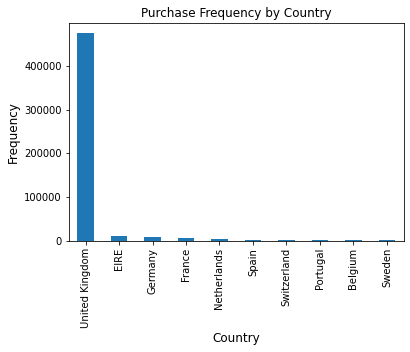

In [292]:
purchase_data['Country'].value_counts()[:10].plot(kind='bar')

plt.title('Purchase Frequency by Country')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('purch_freq_country.png', bbox_inches = 'tight')

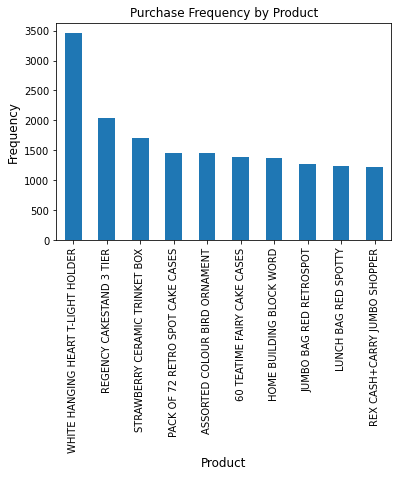

In [293]:
purchase_data['Description'].value_counts()[:10].plot(kind='bar')

plt.title('Purchase Frequency by Product')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('purch_freq_product.png', bbox_inches = 'tight')

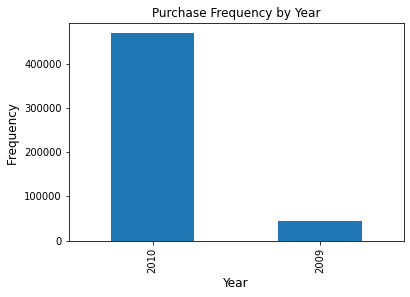

In [294]:
purchase_data['InvoiceYear'].value_counts().plot(kind='bar')

plt.title('Purchase Frequency by Year')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency ', fontsize=12)
plt.savefig('purch_freq_year.png', bbox_inches = 'tight')

# Purchase Amount (\$) by Country, Product, Year

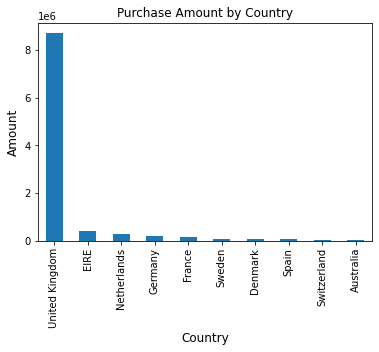

In [295]:
purchase_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

plt.title('Purchase Amount by Country')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.savefig('purch_amt_country.png', bbox_inches = 'tight')

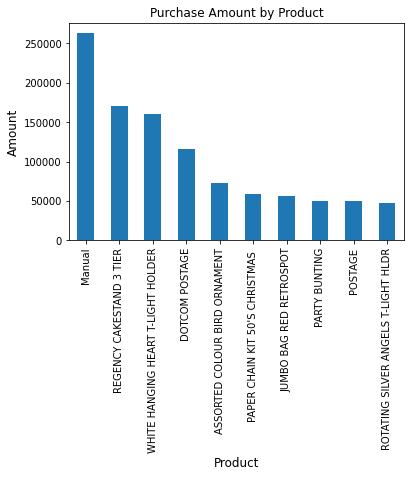

In [296]:
purchase_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

plt.title('Purchase Amount by Product')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.savefig('purch_amt_product.png', bbox_inches = 'tight')

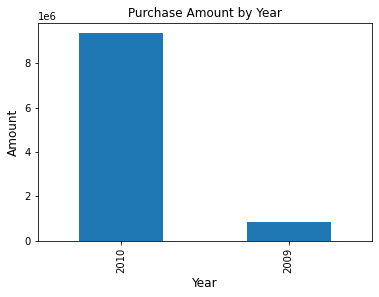

In [297]:
purchase_data.groupby('InvoiceYear')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

plt.title('Purchase Amount by Year')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.savefig('purch_amt_year.png', bbox_inches = 'tight')

# Working with UK Customers (Major Market)

In [10]:
UK_data = purchase_data[purchase_data['Country'] =='United Kingdom']

# Repeat purchase rate (RPR) whole

In [250]:
#Repeat purchase rate = Number of customers that bought more than once/ Total number of customers

In [251]:
UK_data['Customer ID'].nunique()

3971

In [252]:
df = UK_data['Customer ID'].value_counts()
df = pd.DataFrame(df)
df

,Customer ID
17841.0,5043
14606.0,3866
12748.0,2634
17850.0,2499
16549.0,2269
...,...
14086.0,1
13551.0,1
14827.0,1
14380.0,1


In [253]:
df = df.rename(columns = {'Customer ID': 'Count'})
df

,Count
17841.0,5043
14606.0,3866
12748.0,2634
17850.0,2499
16549.0,2269
...,...
14086.0,1
13551.0,1
14827.0,1
14380.0,1


In [254]:
df.to_csv('./rpr.csv')

In [255]:
#Number of customers that bought more than once/ Total number of customers

len(df[df['Count'] > 1]) / len(df)

0.9788466381264165

# Repeat Purchase Rate (Year wise)

In [210]:
UK_09 = UK_data[UK_data['InvoiceYear'] == 2009]
UK_10 = UK_data[UK_data['InvoiceYear'] == 2010]

In [214]:
mini_09 = UK_09['Customer ID'].value_counts()
mini_10 = UK_10['Customer ID'].value_counts()

In [215]:
mini_09 = pd.DataFrame(mini_09)
mini_09 = mini_09.reset_index()

mini_10 = pd.DataFrame(mini_10)
mini_10 = mini_10.reset_index()

In [256]:
mini_10

,ID,frequency
0,17841.0,4506
1,14606.0,3557
2,12748.0,2548
3,16549.0,2269
4,17850.0,2240
...,...,...
3858,14380.0,1
3859,13205.0,1
3860,14366.0,1
3861,13215.0,1


In [257]:
mini_09

,ID,frequency
0,17841.0,537
1,14527.0,356
2,15311.0,313
3,14606.0,309
4,17850.0,259
...,...,...
899,15956.0,1
900,16308.0,1
901,14106.0,1
902,17262.0,1


In [220]:
mini_10 = mini_10.rename(columns = {'index': 'ID', 'Customer ID': 'frequency'})
mini_09 = mini_09.rename(columns = {'index': 'ID', 'Customer ID': 'frequency'})

In [221]:
mini_09['ID'].nunique()

904

In [223]:
len(mini_09[mini_09['frequency'] > 1])

880

In [224]:
len(mini_10[mini_10['frequency'] > 1])

3781

In [225]:
RPR_09 = len(mini_09[mini_09['frequency'] > 1]) / mini_09['ID'].nunique()
RPR_09

0.9734513274336283

In [226]:
RPR_10 = len(mini_10[mini_10['frequency'] > 1]) / mini_10['ID'].nunique()
RPR_10

0.9787729743722495

In [288]:

rpr = pd.DataFrame({'2009': (RPR_09)*100 ,'2010':(RPR_10)*100}, index=['RPR'])
pf = pd.DataFrame({'2009': PF_09, '2010': PF_10}, index=['PF'])
tbp = pd.DataFrame({'2009': TBP_09, '2010': TBP_10}, index=['TBP'])

m_df = pd.concat([rpr, pf, tbp], ignore_index=False)
m_df = m_df.style.set_caption("Retention Metrics")
m_df


,2009,2010
RPR,97.345133,97.877297
PF,1.938053,4.838468
TBP,188.333333,75.437109


In [289]:
import dataframe_image as dfi
df.style.set_caption("Hello World")

dfi.export(m_df, 'rate_table.png')

[0322/004238.550280:INFO:headless_shell.cc(659)] Written to file /var/folders/r6/chkvrc_s7zggf95ldb8k0vkh0000gn/T/tmps_0k5jlq/temp.png.


# Purchase Frequency

In [ ]:
##Purchase frequency = Number of orders in the last 365 days/ Number of unique customers over the last 365 days

In [261]:
UK_09 = UK_data[UK_data['InvoiceYear'] == 2009]
UK_10 = UK_data[UK_data['InvoiceYear'] == 2010]

In [262]:
UK_09['Customer ID'].nunique()

904

In [263]:
UK_09['Invoice'].nunique()

1752

In [264]:
PF_09 = UK_09['Invoice'].nunique() / UK_09['Customer ID'].nunique()
PF_09

1.9380530973451326

In [265]:
PF_10 =UK_10['Invoice'].nunique() / UK_10['Customer ID'].nunique()
PF_10

4.838467512296143

In [266]:
UK_09.to_csv('./PF_09.csv')
UK_10.to_csv('./PF_10.csv')

# Time Between Purchases

In [246]:
TBP_09 = 365/ PF_09
TBP_09

188.33333333333334

In [247]:
TBP_10 = 365/ PF_10
TBP_10

75.43710876892622

# Customer Segmentation based on Recency, Frequency, Monetization

- Recency: Date of Last of Purchase
- Frequency: Total Number of Orders
- Monetization: Average Order Value
- Timeframe: 2 years 


In [11]:
UK_data['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [12]:
PRESENT = UK_data['InvoiceDate'].max()

In [13]:
#For Recency, Calculate the number of days between present date and date of last purchase each customer.
#For Frequency, Calculate the number of orders for each customer.
#For Monetary, Calculate sum of purchase price for each customer.

rfm= UK_data.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'Invoice': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [14]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [15]:
rfm = rfm.rename(columns = {'InvoiceDate':'recency', 'Invoice': 'frequency', 'TotalPrice':'monetary'})

In [16]:
rfm['recency'] = rfm['recency']

In [17]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3971 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    3971 non-null   int64  
 1   frequency  3971 non-null   int64  
 2   monetary   3971 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 124.1 KB


In [18]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.0,164,33,372.86
12608.0,39,16,415.79
12745.0,121,22,723.85
12746.0,175,17,254.55
12747.0,4,154,5080.53


In [19]:
#higher number = higher score
rfm['r_quartile'] = pd.qcut(rfm['recency'], 5, ['5','4','3','2','1']) #lower the better
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 5, ['1','2','3','4','5']) #higher the better
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 5, ['1','2','3','4','5']) #higher the better

In [20]:
rfm['r_quartile'] = pd.to_numeric(rfm['r_quartile'])
rfm['f_quartile'] = pd.to_numeric(rfm['f_quartile'])
rfm['m_quartile'] = pd.to_numeric(rfm['m_quartile'])

In [21]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,164,33,372.86,2,3,2
12608.0,39,16,415.79,3,2,2
12745.0,121,22,723.85,2,2,3
12746.0,175,17,254.55,2,2,2
12747.0,4,154,5080.53,5,5,5


Depending on the nature of the businesses, I would increase or decrease the relative importance of each RFM variable 

- Consumer durables(refrigerator, air conditioner): the monetary value per transaction is normally high but frequency and recency is low. 
- monetary > recency, frequency

- Retail (fashion/cosmetics): a customer who searches and purchases products every month will have a higher recency and frequency score than monetary score. 
- recency, frequency > monetary

# segmenting with K-means Cluster

In [22]:
# X = rfm.iloc[:,:3].values
X = rfm.iloc[:,3:6].values

In [23]:
X

array([[2, 3, 2],
       [3, 2, 2],
       [2, 2, 3],
       ...,
       [1, 1, 2],
       [2, 4, 4],
       [4, 4, 5]])

In [24]:
x = X

# Find the best number of clusters

In [25]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

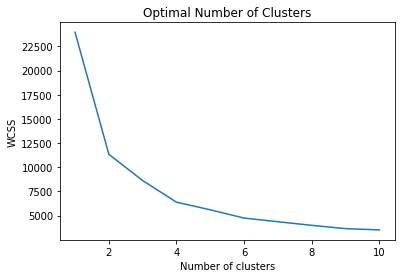

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)

plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #sum of squared distance between each point and the centroid in a cluster
plt.savefig('elbow_graph.png', bbox_inches = 'tight',  dpi=100)
plt.show()


/Users/ebeen94/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


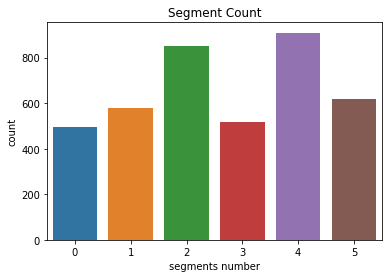

<Figure size 432x288 with 0 Axes>

In [321]:
import seaborn as sns
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

plt.title('Segment Count')
plt.xlabel('segments number')
plt.ylabel('count') #sum of squared distance between each point and the centroid in a cluster
plt.show()
# plt.savefig('cluster_barplot.png', bbox_inches = 'tight')

In [336]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_clusters = kmeans.fit_predict(X)


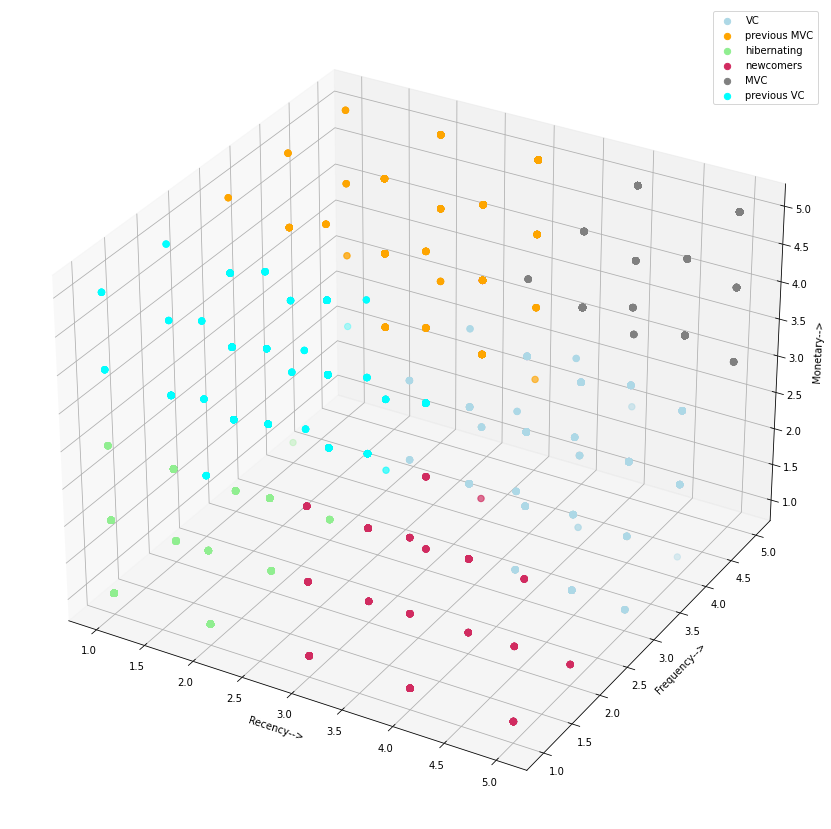

In [374]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'lightblue', label = "VC")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "previous MVC")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'lightgreen', label = "hibernating")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "newcomers")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'grey', label = "MVC ")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = 'cyan', label = "previous VC")

ax.set_xlabel('Recency-->')
ax.set_ylabel('Frequency-->')
ax.set_zlabel('Monetary-->')
ax.legend()
plt.show()

# plt.savefig('./segment_3d')
fig.savefig('segment_3d.png', dpi=100)

In [375]:
rfm['segment'] = pd.Series(y_clusters, index=rfm.index)

In [376]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,segment
Customer ID,,,,,,,
12346.0,164,33,372.86,2,3,2,5
12608.0,39,16,415.79,3,2,2,3
12745.0,121,22,723.85,2,2,3,5
12746.0,175,17,254.55,2,2,2,2
12747.0,4,154,5080.53,5,5,5,4
...,...,...,...,...,...,...,...
18283.0,17,230,641.77,4,5,3,4
18284.0,66,28,461.68,3,2,2,3
18285.0,295,12,427.00,1,1,2,2


In [377]:
rfm['segment'].unique()


array([5, 3, 2, 4, 0, 1], dtype=int32)

In [378]:
rfm['segment'] = rfm['segment'].map({0:'VC', 1: 'previous MVC', 2: 'hibernating', 3:'newcomers',4:'MVC',5:'previous VC' })

In [379]:
rfm.nunique()

recency        301
frequency      471
monetary      3936
r_quartile       5
f_quartile       5
m_quartile       5
segment          6
dtype: int64

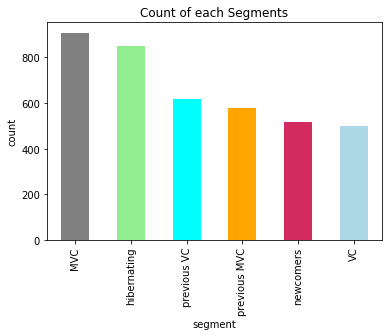

<Figure size 432x288 with 0 Axes>

In [380]:
rfm['segment'].value_counts().plot(kind='bar', color=['grey', 'lightgreen', 'cyan', 'orange', '#D12B60', 'lightblue'])

plt.title('Count of each Segments')
plt.xlabel('segment')
plt.ylabel('count') 
plt.show()
plt.savefig('segment_barplot.png', bbox_inches = 'tight')

([<matplotlib.patches.Wedge at 0x7fa4c60160b8>,
 [Text(0.8276092612897951, 0.7246122484662814, 'VC'),
  Text(-0.566247634068483, 0.9430607705295802, 'previous MVC'),
  Text(-1.0904134145116415, -0.1449088867290863, 'hibernating'),
  Text(-0.5185603436791925, -0.970100597857417, 'newcomers'),
  Text(0.4041116085145383, -1.0230805480820133, 'MVC'),
  Text(1.0160592249271032, -0.42145421037229464, 'previous VC')],
 [Text(0.45142323343079727, 0.3952430446179716, '22.9%'),
  Text(-0.3088623458555362, 0.5143967839252255, '21.4%'),
  Text(-0.5947709533699862, -0.07904121094313799, '15.6%'),
  Text(-0.28285109655228674, -0.5291457806495001, '14.6%'),
  Text(0.2204245137352027, -0.5580439353174617, '13.0%'),
  Text(0.5542141226875108, -0.22988411474852433, '12.5%')])

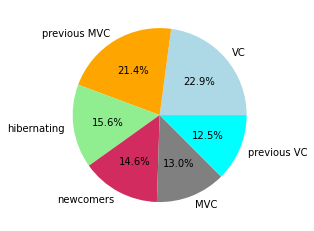

In [381]:
# labels = ['VC', 'previous MVC', 'hibernating', 'newcomers', 'MVC','previous VC']
# #Create pie chart with Matplotlib
# # colors=['grey', 'green', 'black', 'orange', '#D12B60', 'blue'],
# plt.pie(rfm['segment'].value_counts(),labels, autopct='%1.1f%%')
# plt.show()

labels = ['VC', 'previous MVC', 'hibernating', 'newcomers', 'MVC','previous VC']
colours = {'VC': 'lightblue',
           'previous MVC': 'orange',
           'hibernating': 'lightgreen',
           'newcomers': '#D12B60',
           'MVC': 'grey',
           'previous VC': 'cyan'}

plt.pie(rfm['segment'].value_counts(),
          labels=labels,
          colors=[colours[key] for key in labels],
          autopct='%1.1f%%')



In [382]:
rfm['segment'].value_counts()

MVC             909
hibernating     851
previous VC     618
previous MVC    580
newcomers       516
VC              497
Name: segment, dtype: int64

In [140]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      3971 non-null   int64  
 1   index        3971 non-null   int64  
 2   Customer ID  3971 non-null   float64
 3   recency      3971 non-null   int64  
 4   frequency    3971 non-null   int64  
 5   monetary     3971 non-null   float64
 6   r_quartile   3971 non-null   int64  
 7   f_quartile   3971 non-null   int64  
 8   m_quartile   3971 non-null   int64  
 9   segment      3971 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 310.4+ KB


In [141]:
rfm['r_quartile'] = pd.to_numeric(rfm['r_quartile'])
rfm['f_quartile'] = pd.to_numeric(rfm['f_quartile'])
rfm['m_quartile'] = pd.to_numeric(rfm['m_quartile'])

In [142]:
rfm.groupby('segment')['recency','frequency', 'monetary'].mean()

/Users/ebeen94/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,recency,frequency,monetary
segment,,,
MVC,12.887789,245.878988,5280.464378
VC,17.008048,49.038229,761.491187
hibernating,214.990599,15.119859,227.361610
newcomers,37.804264,17.232558,275.548198
previous VC,113.151085,84.570952,1586.548506


In [143]:
rfm.groupby('segment')['r_quartile','f_quartile', 'm_quartile'].mean()

/Users/ebeen94/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,r_quartile,f_quartile,m_quartile
segment,,,
MVC,4.607261,4.618262,4.555556
VC,4.448692,2.913481,2.893360
hibernating,1.361927,1.524089,1.400705
newcomers,3.544574,1.608527,1.567829
previous VC,2.186978,3.439065,3.615192


In [144]:
import pandas as pd
equiv = {0:'VC', 1: 'previous VC', 2: 'hibernating', 3:'newcomers',3:'MVC',3:'make them spend',3:'previous VC' }
equiv = {7001:1, 8001:2, 9001:3}
df = pd.DataFrame({"A": [7001, 8001, 9001]})
df["B"] = df["A"].map(equiv)

In [146]:
# rfm = rfm.reset_index(level=0)
rfm

,level_0,index,Customer ID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,segment
0,0,0,12346.0,164,33,372.86,2,3,2,previous VC
1,1,1,12608.0,39,16,415.79,3,2,2,newcomers
2,2,2,12745.0,121,22,723.85,2,2,3,previous VC
3,3,3,12746.0,175,17,254.55,2,2,2,hibernating
4,4,4,12747.0,4,154,5080.53,5,5,5,MVC
...,...,...,...,...,...,...,...,...,...,...
3966,3966,3966,18283.0,17,230,641.77,4,5,3,MVC
3967,3967,3967,18284.0,66,28,461.68,3,2,2,newcomers
3968,3968,3968,18285.0,295,12,427.00,1,1,2,hibernating
3969,3969,3969,18286.0,111,67,1296.43,2,4,4,previous VC


In [147]:
new_df = pd.merge(UK_data, rfm, how='left', on='Customer ID')

In [148]:
new_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceTime,InvoiceYear,...,TotalPrice,level_0,index,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,07:45:00,2009,...,83.40,201.0,201.0,314.0,62.0,2017.20,1.0,4.0,4.0,previous VC
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,2009,...,81.00,201.0,201.0,314.0,62.0,2017.20,1.0,4.0,4.0,previous VC
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,07:45:00,2009,...,81.00,201.0,201.0,314.0,62.0,2017.20,1.0,4.0,4.0,previous VC
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,07:45:00,2009,...,100.80,201.0,201.0,314.0,62.0,2017.20,1.0,4.0,4.0,previous VC
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,07:45:00,2009,...,30.00,201.0,201.0,314.0,62.0,2017.20,1.0,4.0,4.0,previous VC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474933,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,20:01:00,2010,...,5.90,3418.0,3418.0,0.0,164.0,756.51,5.0,5.0,3.0,MVC
474934,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,20:01:00,2010,...,3.75,3418.0,3418.0,0.0,164.0,756.51,5.0,5.0,3.0,MVC
474935,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,20:01:00,2010,...,3.75,3418.0,3418.0,0.0,164.0,756.51,5.0,5.0,3.0,MVC
474936,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,20:01:00,2010,...,7.50,3418.0,3418.0,0.0,164.0,756.51,5.0,5.0,3.0,MVC


In [149]:
#output for visualization

new_df.to_csv('./crm_segment.csv')